In [1]:
import pandas as pd

### Créer un DataFrame à partir d’un dictionnaire de listes

In [2]:
# Créons un dictionnaire de listes
data = {'Prénom':['Olivier', 'Christine', 'Anne', 'Eric'],'Age':[65,31,23,48], 'Mois de naissance': ['Juin','Décembre','Septembre','Décembre']}

# Et un DataFrame en essayant d'imposer que les éléments soient de type int32
df   = pd.DataFrame(data, dtype='int32')

In [3]:
# Affichons le début de ce DataFrame (5 premières lignes; * configurable *)
df.head()

,Prénom,Age,Mois de naissance
0,Olivier,65,Juin
1,Christine,31,Décembre
2,Anne,23,Septembre
3,Eric,48,Décembre


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Prénom             4 non-null      object
 1   Age                4 non-null      int32 
 2   Mois de naissance  4 non-null      object
dtypes: int32(1), object(2)
memory usage: 208.0+ bytes


In [5]:
df['Age'].describe()

count     4.000000
mean     41.750000
std      18.679311
min      23.000000
25%      29.000000
50%      39.500000
75%      52.250000
max      65.000000
Name: Age, dtype: float64

In [6]:
df.columns[1]

'Age'

In [7]:
df = df.set_index('Prénom')

In [8]:
df.loc[['Olivier']]

,Age,Mois de naissance
Prénom,,
Olivier,65,Juin


In [9]:
df.loc['Olivier']['Mois de naissance']

'Juin'

In [10]:
df.loc[['Olivier', 'Eric']].Age

Prénom
Olivier    65
Eric       48
Name: Age, dtype: int32

### Importer les données d'un fichier CSV

In [11]:
df_covid = pd.read_csv("https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total_v2.csv")

In [12]:
# Affichons le début de ce DataFrame (5 premières lignes; * configurable *)
df_covid.head()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
0,2020-01-24,NaN,GE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/20094/annexe/0,NaN,NaN,NaN,NaN
1,2020-01-25,NaN,GE,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
2,2020-01-26,NaN,GE,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
3,2020-01-27,NaN,GE,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
4,2020-01-28,NaN,GE,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN


In [13]:
# Beaucoup d'éléments NaN
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176 entries, 0 to 6175
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                6176 non-null   object 
 1   time                                2973 non-null   object 
 2   abbreviation_canton_and_fl          6176 non-null   object 
 3   ncumul_tested                       167 non-null    float64
 4   ncumul_conf                         6107 non-null   float64
 5   new_hosp                            590 non-null    float64
 6   current_hosp                        5073 non-null   float64
 7   current_icu                         4222 non-null   float64
 8   current_vent                        1841 non-null   float64
 9   ncumul_released                     2663 non-null   float64
 10  ncumul_deceased                     5861 non-null   float64
 11  source                              6175 no

In [14]:
df_covid.shape

(6176, 16)

In [15]:
# Essayer également avec 'date'
df_covid['abbreviation_canton_and_fl'].describe()

count     6176
unique      27
top         GE
freq       289
Name: abbreviation_canton_and_fl, dtype: object

In [16]:
df_covid.index

RangeIndex(start=0, stop=6176, step=1)

In [17]:
# Le champ 'date' est interprété comme un objet de type string
# De plus, on aimerait que le tableau soit indexé par la date
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid = df_covid.set_index('date')

In [18]:
df_covid.head()

,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
date,,,,,,,,,,,,,,,
2020-01-24,NaN,GE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/20094/annexe/0,NaN,NaN,NaN,NaN
2020-01-25,NaN,GE,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
2020-01-26,NaN,GE,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
2020-01-27,NaN,GE,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
2020-01-28,NaN,GE,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN


In [19]:
# On peut faire cette manipulation à l'appel de la fonction read_csv
# Sélectionnons aussi un sous-ensemble des colonnes
df_covid = pd.read_csv("https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total_v2.csv", usecols=[0,2,4,6,10], index_col="date", parse_dates=True)

In [20]:
df_covid.index

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-11-08', '2020-11-08', '2020-11-08', '2020-11-08',
               '2020-11-08', '2020-11-08', '2020-11-08', '2020-11-08',
               '2020-11-08', '2020-11-09'],
              dtype='datetime64[ns]', name='date', length=6176, freq=None)

In [21]:
df_covid.head()

,abbreviation_canton_and_fl,ncumul_conf,current_hosp,ncumul_deceased
date,,,,
2020-01-24,GE,NaN,NaN,NaN
2020-01-25,GE,0.0,NaN,NaN
2020-01-26,GE,0.0,NaN,NaN
2020-01-27,GE,0.0,NaN,NaN
2020-01-28,GE,0.0,NaN,NaN


In [22]:
df_covid.shape

(6176, 4)

In [23]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6176 entries, 2020-01-24 to 2020-11-09
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   abbreviation_canton_and_fl  6176 non-null   object 
 1   ncumul_conf                 6107 non-null   float64
 2   current_hosp                5073 non-null   float64
 3   ncumul_deceased             5861 non-null   float64
dtypes: float64(3), object(1)
memory usage: 241.2+ KB


### Sélectionner et filtrer des éléments

In [24]:
# Retirons toutes les lignes qui contiennent au moins un NaN
df_covid.dropna().info() # thresh=3

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4967 entries, 2020-02-25 to 2020-11-09
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   abbreviation_canton_and_fl  4967 non-null   object 
 1   ncumul_conf                 4967 non-null   float64
 2   current_hosp                4967 non-null   float64
 3   ncumul_deceased             4967 non-null   float64
dtypes: float64(3), object(1)
memory usage: 194.0+ KB


In [25]:
# Combien de cantons (+ Liechtenstein / Triesenberg: FL)
df_covid['abbreviation_canton_and_fl'].unique().size

27

In [26]:
# Gardons les lignes pour lesquelles ncumul_conf > 10000
df_covid[ df_covid['ncumul_conf'] > 10000 ]

,abbreviation_canton_and_fl,ncumul_conf,current_hosp,ncumul_deceased
date,,,,
2020-09-23,VD,10005.0,36.0,314.0
2020-09-24,VD,10086.0,37.0,316.0
2020-09-25,VD,10169.0,39.0,317.0
2020-09-26,VD,10220.0,44.0,317.0
2020-09-27,VD,10249.0,43.0,317.0
...,...,...,...,...
2020-11-07,TI,10052.0,267.0,391.0
2020-11-08,FR,15298.0,192.0,201.0
2020-11-08,SG,10827.0,204.0,117.0


In [27]:
# Gardons les lignes pour lesquelles ncumul_conf > 10000 pour le canton de Vaud uniquement
df_covid_filtered = df_covid[ df_covid['ncumul_conf'] > 10000 ]
df_covid_filtered[ df_covid_filtered['abbreviation_canton_and_fl'] == "VD" ].head()

,abbreviation_canton_and_fl,ncumul_conf,current_hosp,ncumul_deceased
date,,,,
2020-09-23,VD,10005.0,36.0,314.0
2020-09-24,VD,10086.0,37.0,316.0
2020-09-25,VD,10169.0,39.0,317.0
2020-09-26,VD,10220.0,44.0,317.0
2020-09-27,VD,10249.0,43.0,317.0


### Grouper un DataFrame par une (ou plusieurs) colonne(s)

In [28]:
# Groupons par Canton
df_covid_grouped = df_covid.groupby('abbreviation_canton_and_fl')

In [29]:
# Nombre maximum d'hospitalisations atteint par canton
df_covid_grouped.current_hosp.max()

abbreviation_canton_and_fl
AG    133.0
AI     10.0
AR     24.0
BE    376.0
BL     99.0
BS    119.0
FL     16.0
FR    202.0
GE    608.0
GL     19.0
GR     63.0
JU     95.0
LU    100.0
NE    125.0
NW     12.0
OW     13.0
SG    204.0
SH     20.0
SO     62.0
SZ     25.0
TG     46.0
TI    415.0
UR     10.0
VD    468.0
VS    337.0
ZG     36.0
ZH    336.0
Name: current_hosp, dtype: float64

### Mais on pourrait vouloir rééchantillonner ces données (grâce à l'index DateTimeIndex)

In [30]:
# Par exemple: Nombre maximum d'hospitalisations **hebdomadaire** atteint par canton
df_covid_grouped.resample('W').current_hosp.max()

abbreviation_canton_and_fl  date      
AG                          2020-03-01      NaN
                            2020-03-08      NaN
                            2020-03-15      1.0
                            2020-03-22     25.0
                            2020-03-29     50.0
                                          ...  
ZH                          2020-10-11     50.0
                            2020-10-18     71.0
                            2020-10-25    159.0
                            2020-11-01    258.0
                            2020-11-08    336.0
Name: current_hosp, Length: 987, dtype: float64

In [31]:
# Pour le canton de Vaud
df_covid_grouped.resample('W').current_hosp.max()['VD']

date
2020-03-01      4.0
2020-03-08     22.0
2020-03-15    113.0
2020-03-22    259.0
2020-03-29    409.0
2020-04-05    419.0
2020-04-12    389.0
2020-04-19    326.0
2020-04-26    218.0
2020-05-03    164.0
2020-05-10    100.0
2020-05-17     74.0
2020-05-24     49.0
2020-05-31     35.0
2020-06-07     28.0
2020-06-14     25.0
2020-06-21     23.0
2020-06-28     16.0
2020-07-05     14.0
2020-07-12     11.0
2020-07-19     13.0
2020-07-26     15.0
2020-08-02     17.0
2020-08-09     17.0
2020-08-16     13.0
2020-08-23     19.0
2020-08-30     25.0
2020-09-06     23.0
2020-09-13     38.0
2020-09-20     45.0
2020-09-27     44.0
2020-10-04     48.0
2020-10-11     81.0
2020-10-18    161.0
2020-10-25    254.0
2020-11-01    433.0
2020-11-08    468.0
Name: current_hosp, dtype: float64

In [32]:
# La même chose mais nombre mensuel
df_covid_grouped.resample('M').current_hosp.max()['VD']

date
2020-02-29      4.0
2020-03-31    419.0
2020-04-30    419.0
2020-05-31    121.0
2020-06-30     28.0
2020-07-31     15.0
2020-08-31     25.0
2020-09-30     48.0
2020-10-31    409.0
2020-11-30    468.0
Name: current_hosp, dtype: float64

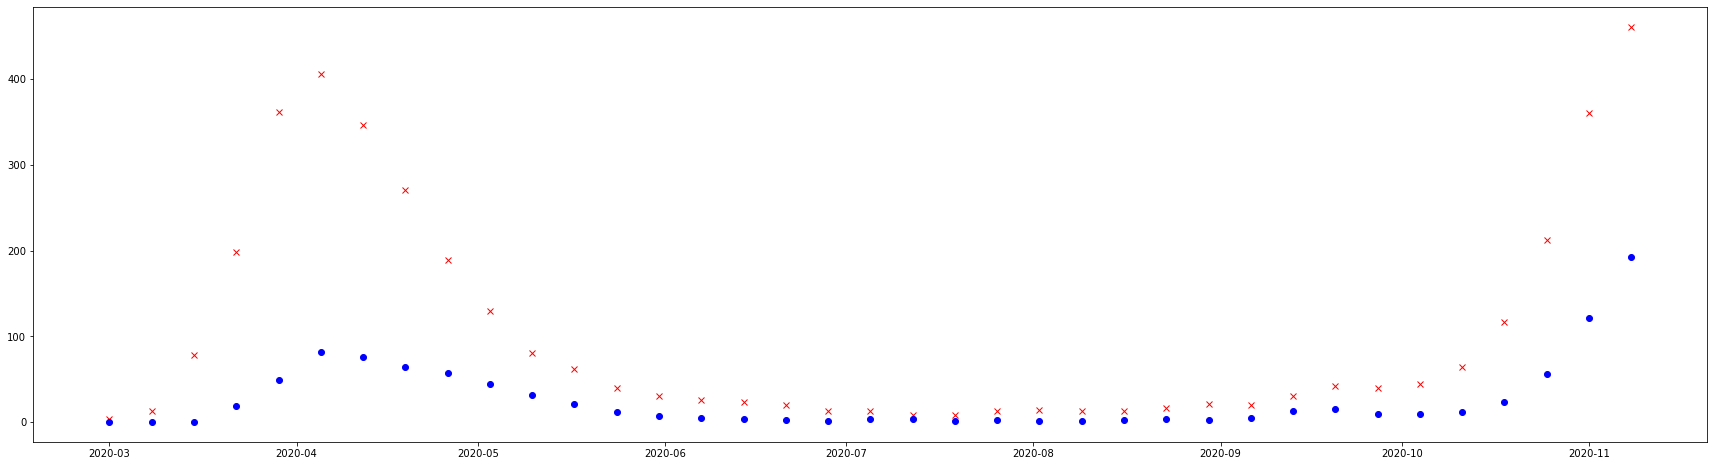

In [33]:
# Petit exemple avec Matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(30,8))
plt.plot(df_covid_grouped.resample('W').current_hosp.mean()['VD'], 'rx')
plt.plot(df_covid_grouped.resample('W').current_hosp.mean()['FR'], 'bo')

### Petit exercice (pas si) simple

Déterminer combien de journées de mesures sont répertoriés par canton?

In [40]:
# Le nombre de jours depuis le 24 janvier 2020:
delta = (df_covid.index[-1]-df_covid.index[0]).days+1 # Convertir TimeDelta en un nombre entier (de jours) via .days

Mais les cantons ne rapportent par leurs mesures tous les jours. Sauf un, lequel? :-)

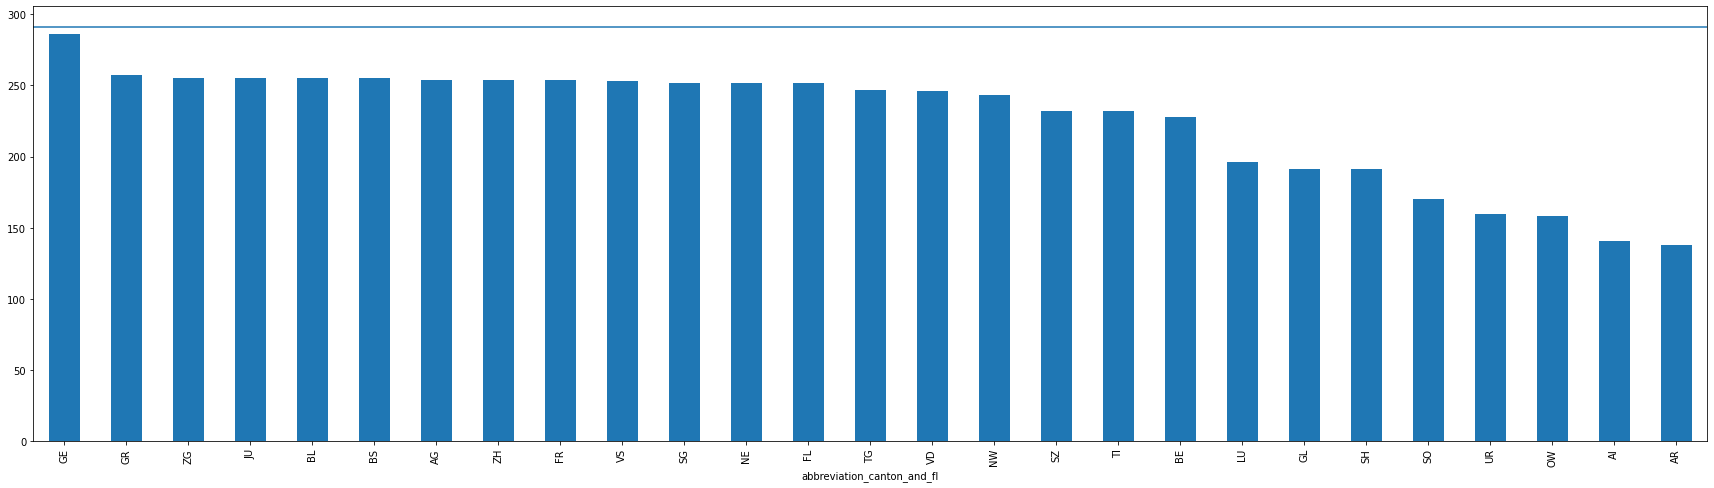

In [44]:
# A vous de jouer (avec et sans les NaN, pour ncumul_conf, current_hosp et ncumul_deceased)
days_reported = df_covid_grouped.ncumul_conf.count().reset_index(name='count').sort_values(['count'], ascending=False)
days_reported.plot(x='abbreviation_canton_and_fl', y='count', kind='bar',figsize=(30,8),legend=False).hlines(delta,-2,30)

Astuce: Une option est de passer par la function agg()